In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from openTSNE import TSNE as oTSNE
from MulticoreTSNE import MulticoreTSNE as mTSNE

In [2]:
data = pd.read_csv("features_all_labels.csv")

In [3]:
data.head()

,Unnamed: 0,path,instrument,emotion,f_zero_crossings_sum,f_tempo,f_chroma_stft_mean,f_chroma_stft_var,f_chroma_cqt_mean,f_chroma_cqt_var,...,f_poly_2_var,f_tempogram_mean,f_tempogram_var,f_fourier_tempogram_mean_real,f_fourier_tempogram_mean_imag,f_fourier_tempogram_var,f_harm_mean,f_harm_var,f_perc_mean,f_perc_var
0,0,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,10333,117.453835,0.258224,0.098745,0.355288,0.073224,...,2.976036,0.153620,0.035368,0.585484,0.009401,529.72450,-0.000011,0.013111,-0.000123,0.000860
1,1,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,11497,123.046875,0.237622,0.098343,0.380657,0.073265,...,3.200005,0.140677,0.030350,0.610382,0.005564,614.91833,-0.000043,0.013628,-0.000234,0.000619
2,2,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,9886,117.453835,0.269323,0.112593,0.355649,0.075457,...,3.096585,0.155980,0.036259,0.576286,0.005338,503.57983,0.000013,0.014331,-0.000292,0.000574
3,3,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,11491,172.265625,0.231684,0.093056,0.382025,0.064792,...,0.333460,0.140639,0.030910,0.763477,0.017326,972.54380,-0.001136,0.000954,-0.000566,0.000128
4,4,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,12285,184.570312,0.191707,0.088536,0.418141,0.071533,...,0.401022,0.136021,0.027755,0.799386,0.023571,1114.44630,-0.001018,0.001183,-0.000657,0.000174


In [4]:
data.columns

Index(['Unnamed: 0', 'path', 'instrument', 'emotion', 'f_zero_crossings_sum',
       'f_tempo', 'f_chroma_stft_mean', 'f_chroma_stft_var',
       'f_chroma_cqt_mean', 'f_chroma_cqt_var', 'f_chroma_cens_mean',
       'f_chroma_cens_var', 'f_melspec_mean', 'f_melspec_var', 'f_mfcc_3_mean',
       'f_mfcc_3_var', 'f_mfcc_5_mean', 'f_mfcc_5_var', 'f_mfcc_8_mean',
       'f_mfcc_8_var', 'f_mfcc_10_mean', 'f_mfcc_10_var', 'f_mfcc_11_mean',
       'f_mfcc_11_var', 'f_mfcc_12_mean', 'f_mfcc_12_var', 'f_mfcc_13_mean',
       'f_mfcc_13_var', 'f_mfcc_14_mean', 'f_mfcc_14_var', 'f_mfcc_15_mean',
       'f_mfcc_15_var', 'f_mfcc_16_mean', 'f_mfcc_16_var', 'f_mfcc_17_mean',
       'f_mfcc_17_var', 'f_mfcc_18_mean', 'f_mfcc_18_var', 'f_mfcc_19_mean',
       'f_mfcc_19_var', 'f_mfcc_20_mean', 'f_mfcc_20_var', 'f_rms_mean',
       'f_spec_centr_mean', 'f_spec_centr_var', 'f_spec_bandw_mean',
       'f_spec_bandw_var', 'f_spec_contr_mean', 'f_spec_contr_var',
       'f_spec_flat_mean', 'f_spec_flat_var'

In [5]:
x_cols = ['f_zero_crossings_sum',
       'f_tempo', 'f_chroma_stft_mean', 'f_chroma_stft_var',
       'f_chroma_cqt_mean', 'f_chroma_cqt_var', 'f_chroma_cens_mean',
       'f_chroma_cens_var', 'f_melspec_mean', 'f_melspec_var', 'f_mfcc_3_mean',
       'f_mfcc_3_var', 'f_mfcc_5_mean', 'f_mfcc_5_var', 'f_mfcc_8_mean',
       'f_mfcc_8_var', 'f_mfcc_10_mean', 'f_mfcc_10_var', 'f_mfcc_11_mean',
       'f_mfcc_11_var', 'f_mfcc_12_mean', 'f_mfcc_12_var', 'f_mfcc_13_mean',
       'f_mfcc_13_var', 'f_mfcc_14_mean', 'f_mfcc_14_var', 'f_mfcc_15_mean',
       'f_mfcc_15_var', 'f_mfcc_16_mean', 'f_mfcc_16_var', 'f_mfcc_17_mean',
       'f_mfcc_17_var', 'f_mfcc_18_mean', 'f_mfcc_18_var', 'f_mfcc_19_mean',
       'f_mfcc_19_var', 'f_mfcc_20_mean', 'f_mfcc_20_var', 'f_rms_mean',
       'f_spec_centr_mean', 'f_spec_centr_var', 'f_spec_bandw_mean',
       'f_spec_bandw_var', 'f_spec_contr_mean', 'f_spec_contr_var',
       'f_spec_flat_mean', 'f_spec_flat_var', 'f_spec_roll_mean',
       'f_spec_roll_var', 'f_tonnetz_mean', 'f_tonnetz_var', 'f_poly_0_mean',
       'f_poly_0_var', 'f_poly_1_mean', 'f_poly_1_var', 'f_poly_2_mean',
       'f_poly_2_var', 'f_tempogram_mean', 'f_tempogram_var',
       'f_fourier_tempogram_mean_real', 'f_fourier_tempogram_mean_imag',
       'f_fourier_tempogram_var', 'f_harm_mean', 'f_harm_var', 'f_perc_mean',
       'f_perc_var']
x = data.loc[:,x_cols]

In [6]:
x

,f_zero_crossings_sum,f_tempo,f_chroma_stft_mean,f_chroma_stft_var,f_chroma_cqt_mean,f_chroma_cqt_var,f_chroma_cens_mean,f_chroma_cens_var,f_melspec_mean,f_melspec_var,...,f_poly_2_var,f_tempogram_mean,f_tempogram_var,f_fourier_tempogram_mean_real,f_fourier_tempogram_mean_imag,f_fourier_tempogram_var,f_harm_mean,f_harm_var,f_perc_mean,f_perc_var
0,10333,117.453835,0.258224,0.098745,0.355288,0.073224,0.245446,0.023090,-76.043070,117.573100,...,2.976036,0.153620,0.035368,0.585484,0.009401,529.72450,-1.127914e-05,0.013111,-0.000123,0.000860
1,11497,123.046875,0.237622,0.098343,0.380657,0.073265,0.258766,0.016373,-75.508550,133.518750,...,3.200005,0.140677,0.030350,0.610382,0.005564,614.91833,-4.275438e-05,0.013628,-0.000234,0.000619
2,9886,117.453835,0.269323,0.112593,0.355649,0.075457,0.245970,0.022832,-75.459190,138.818120,...,3.096585,0.155980,0.036259,0.576286,0.005338,503.57983,1.314697e-05,0.014331,-0.000292,0.000574
3,11491,172.265625,0.231684,0.093056,0.382025,0.064792,0.265052,0.013081,-74.848010,134.865140,...,0.333460,0.140639,0.030910,0.763477,0.017326,972.54380,-1.136094e-03,0.000954,-0.000566,0.000128
4,12285,184.570312,0.191707,0.088536,0.418141,0.071533,0.265087,0.013062,-74.030340,159.250610,...,0.401022,0.136021,0.027755,0.799386,0.023571,1114.44630,-1.017552e-03,0.001183,-0.000657,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,12035,129.199219,0.233833,0.085907,0.287845,0.080724,0.207663,0.040210,-75.535576,113.295600,...,0.060125,0.145631,0.034920,0.557559,-0.029431,628.63740,-1.157843e-06,0.000213,-0.000012,0.000006
5610,12454,107.666016,0.245914,0.091502,0.290722,0.079875,0.208094,0.040030,-76.197820,105.468216,...,0.060977,0.147539,0.033305,0.516971,0.009663,435.61163,-3.330008e-08,0.000240,-0.000015,0.000006
5611,11941,234.907670,0.235876,0.094154,0.279254,0.082665,0.201635,0.042677,-76.574090,92.812126,...,0.059164,0.151024,0.033891,0.513517,-0.006917,403.71008,-1.003873e-06,0.000251,-0.000016,0.000005
5612,23319,89.102909,0.218647,0.087617,0.365741,0.078662,0.244841,0.023386,-77.983530,53.549572,...,2.096623,0.093263,0.016462,0.658194,0.013728,960.32310,-1.369764e-05,0.005117,-0.000107,0.001069


In [7]:
y_instrument = data.instrument.replace({'flute': 0,
'sarod': 1,
'sitar': 2})
y_instrument

0       0
1       0
2       0
3       0
4       0
       ..
5609    1
5610    1
5611    1
5612    1
5613    1
Name: instrument, Length: 5614, dtype: int64

In [8]:
kw ={'flute': 0,
'sarod': 1,
'sitar': 2}
kw_inv = {v: k for k, v in kw.items()}
kw_inv

{0: 'flute', 1: 'sarod', 2: 'sitar'}

In [9]:
y_emotion = data.emotion.replace({'anxiety': 0,
'calm': 1,
'sad': 2,
'happy': 3})
y_emotion

0       0
1       0
2       0
3       0
4       0
       ..
5609    2
5610    2
5611    2
5612    2
5613    2
Name: emotion, Length: 5614, dtype: int64

In [10]:
data.emotion.value_counts()

anxiety    1565
calm       1526
sad        1272
happy      1251
Name: emotion, dtype: int64

In [11]:
embeddings = manifold.TSNE(perplexity=100).fit_transform(x)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

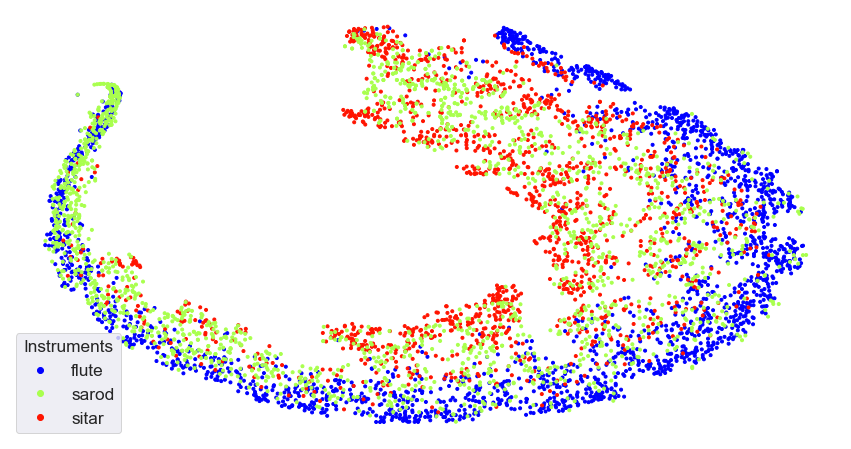

In [12]:
(fig, subplots) = plt.subplots(1, 1, figsize=(15, 8))
scatter = plt.scatter(vis_x, vis_y, c=y_instrument, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.clim(-0.5, 2.5)
handles, labels = scatter.legend_elements()
labels = ['flute', 'sarod', 'sitar']
legend1 = subplots.legend(
    handles, labels,
    loc="lower left", title="Instruments",
    fontsize='x-large', title_fontsize='x-large'
)
legend1.set_label("string")
plt.axis('off')
plt.savefig('TSNE-instrument.png')

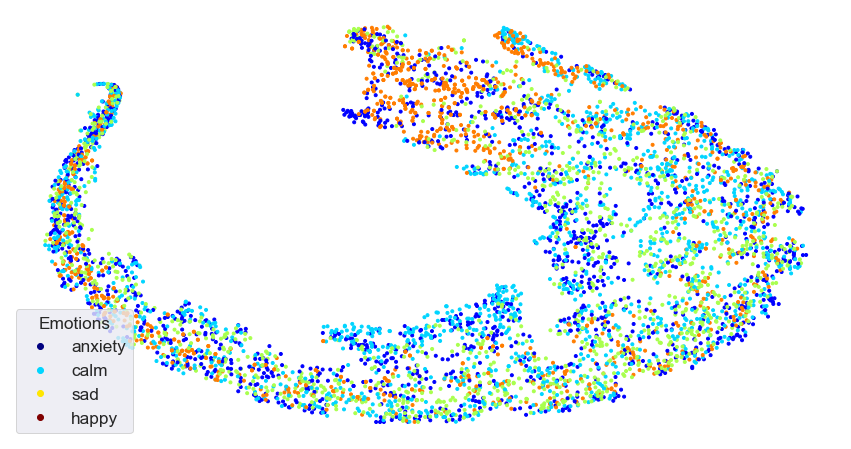

In [13]:
(fig, subplots) = plt.subplots(1, 1, figsize=(15, 8))
scatter = plt.scatter(vis_x, vis_y, c=y_emotion, cmap=plt.cm.get_cmap("jet", 10), marker='.')
handles, labels = scatter.legend_elements()
labels = ['anxiety', 'calm', 'sad', 'happy']
legend1 = subplots.legend(
    handles, labels,
    loc="lower left", title="Emotions",
    fontsize='x-large', title_fontsize='x-large'
)
plt.clim(-0.5, 4.5)
plt.axis('off')
plt.savefig('TSNE-emotion.png')